To install, use `conda install rdkit -c rdkit`.

In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import AllChem
from collections import Counter

1. Get molecular structure with given SMILE_str.
2. Read functional groups.

In [11]:
data = pd.read_csv('Data/HCEPD_100K.csv') # Try using 100K for practice


In [12]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [13]:
molecule = Chem.MolFromSmiles(data['SMILES_str'][0]) # Practise on a single molecule.
molecule # Returning arguments like below indicates loaded successfully.

In [14]:
molecule is None # Alternatively by this way to check if the molecule is loaded properly.

False

In [15]:
molecule.GetAtoms()

In [16]:
# First we care atoms as the existence of some specific atoms might has something to do with PCE.
atomlist = []
for atom in molecule.GetAtoms():
    atomlist.append(atom.GetAtomicNum())
atomlist
# It should be useful when we try to find what atoms exist in a molecule as the atomic number is unique for each element.

[6, 6, 6, 6, 6, 6, 6, 6, 34, 6, 6, 8, 6, 6, 6, 6, 7, 16, 7, 6, 6, 6, 6, 7]

In [17]:
# Use something like this to classify molecules with/without atom x.
molecular_type_a = []
molecular_type_b = []
if 34 in atomlist:
    molecular_type_a.append(data.loc[0])

In [18]:
data['stoich_str'][0]

'C18H9N3OSSe'

In [19]:
'Se' in data['stoich_str'][0] # Alernatively we can just directly do it like this to classify contained elements.

True

In [20]:
# What else other than elements/atoms we want to classify.
# Maybe number of C-C double bonds?

In [21]:
double_count = 0
for i in range(len(atomlist)):
    if str(molecule.GetBonds()[i].GetBondType()) == 'DOUBLE':
        double_count += 1
double_count

2

In [25]:
for i in range(len(atomlist)):
    print(molecule.GetBonds()[i].GetBondType())

SINGLE
DOUBLE
SINGLE
DOUBLE
SINGLE
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
SINGLE


In [22]:
# Maybe also the number of rings?
ring_count = 0
for i in range(len(atomlist)):
    if molecule.GetAtomWithIdx(0).IsInRing() == True:
        ring_count += 1
ring_count

24

In [23]:
# sort dataframe by descending pce value
# extract molecules that have pce more than 10
data_hipce = data.sort_values('pce', ascending=False)
data_pce10 = data_hipce.loc[data_hipce['pce'] > 10]
print('there are', len(data_pce10), 'molecules that have pce more than 10')
data_pce10.head()

there are 637 molecules that have pce more than 10


,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
89026,267487,C1C=Cc2[se]c3c4[SiH2]C(=Cc4c4nsnc4c3c12)c1cncc...,C18H9N5S2SeSi,466.4821,11.097939,0.835571,204.411996,-5.435571,1.435758,-3.999813,C1=Cc2[se]c3c4[SiH2]C(=Cc4c4nsnc4c3c2C1)c1cncc...
48713,1852537,[SiH2]1C=c2c3cc(C4=CC=C[SiH2]4)c4nsnc4c3c3c4ns...,C24H14N4S2Si2,478.7066,11.089069,0.828104,206.090379,-5.428104,1.428751,-3.999353,C1=CC=C([SiH2]1)c1cc2c(c3nsnc13)c1c3nsnc3c3ccc...
87897,1541661,[SiH2]1C=Cc2[se]c3c(sc4cc([se]c34)-c3cncc4nsnc...,C15H7N3S2Se2Si,479.3793,11.084254,0.854591,199.616078,-5.454591,1.455117,-3.999474,C1=Cc2[se]c3c(sc4cc([se]c34)-c3cncc4nsnc34)c2[...
20301,2930157,C1C=CC=C1c1cc2c3nsnc3c3c4c5nsnc5ccc4c4=C[SiH2]...,C24H13N5S2Si,463.6197,11.064108,0.851306,200.022349,-5.451306,1.452847,-3.998458,C1=CC=C(C1)c1cc2c3nsnc3c3c4c5nsnc5ccc4c4=C[SiH...
67356,1751105,[SiH2]1C=CC=C1c1cc2c3nsnc3c3c(sc4ccc5cscc5c34)...,C22H10N4S4Si,486.6990,11.063341,0.783588,217.293230,-5.383588,1.387194,-3.996394,C1=CC=C([SiH2]1)c1cc2c3nsnc3c3c(sc4ccc5cscc5c3...


In [24]:
data_pce10['SMILES_str'].values[0]

'C1C=Cc2[se]c3c4[SiH2]C(=Cc4c4nsnc4c3c12)c1cncc2nsnc12'

In [25]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles(data_pce10['SMILES_str'].values[0])
mol2 = Chem.MolFromSmiles(data_pce10['SMILES_str'].values[1])
mol3 = Chem.MolFromSmiles(data_pce10['SMILES_str'].values[2])
mols = [mol1,mol2,mol3]
res=rdFMCS.FindMCS(mols)
res
res.numAtoms

13

In [26]:
res.smartsString

'[#6](:,-[#6]):,-[#6]:[#6]:[#6]:[#6]-,:[#6](:,-[#6]):[#6]1:[#7]:[#16]:[#7]:[#6]:1'

In [43]:
mcs = Chem.MolToSmiles(Chem.MolFromSmarts(res.smartsString))
mcs = mcs.replace(':', '')
mcs

'CCCCCCC(C)C1CN[SH]N1'

In [46]:
m = Chem.MolFromSmiles(mcs)
m

In [45]:
AllChem.Compute2DCoords(m)

0

# Draw Chemical Structual

In [62]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

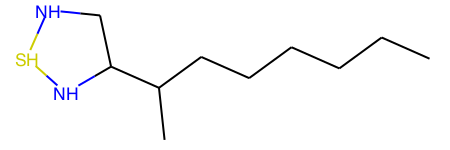

In [48]:
m

In [50]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [55]:
data['structure'] = ""

In [56]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,structure
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,


In [57]:
for i in range(5):
    data['structure'].values[i] = Chem.MolFromSmiles(data['SMILES_str'].values[i])

In [63]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,structure
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,<rdkit.Chem.rdchem.Mol object at 0x1204c7530>
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,<rdkit.Chem.rdchem.Mol object at 0x120510e90>
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,<rdkit.Chem.rdchem.Mol object at 0x120510ee0>
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,<rdkit.Chem.rdchem.Mol object at 0x120510f30>
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,<rdkit.Chem.rdchem.Mol object at 0x120510f80>


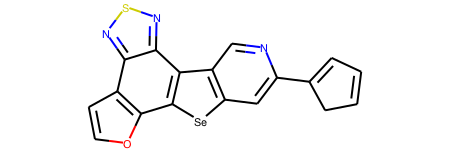

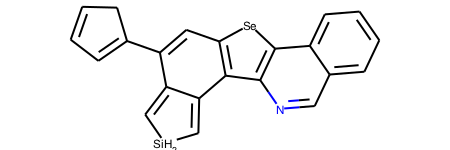

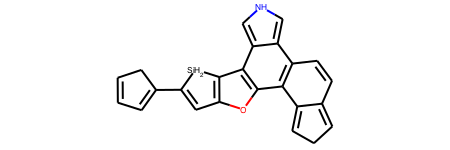

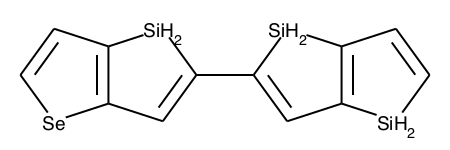

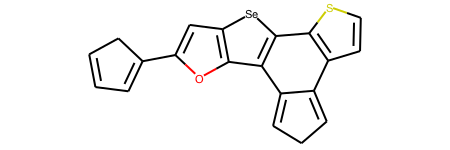

In [66]:
for i in range(5):
    display(data['structure'].values[i])

# find all molecules contain sulfer only

In [80]:
def sulfer(x):
    if (x.find('S') != -1) & (x.find('Si') == -1) & (x.find('Se') == -1):
        return True
    else:
        return False
data_sulfer = data[[sulfer(x) for x in data['stoich_str']]]
data_sulfer.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,structure
24,2359381,C1C=CC=C1C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1c1...,C26H14N2OS2,434.5416,4.112982,0.299549,211.318161,-4.899549,1.409229,-3.490319,C1=CC=C(C1)C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1...,
30,131187,C1C=c2c3ccc4nsnc4c3c3cnc4C=C(Cc4c3c2=C1)C1=CC=CC1,C24H15N3S,377.4695,6.517681,0.691659,145.026911,-5.291659,1.706854,-3.584805,C1=CC=C(C1)C1=Cc2ncc3c(c2C1)c1=CCC=c1c1ccc2nsn...,
40,912065,C1C=CC=C1C1=Cc2c(C1)c1sc3ccsc3c1c1cocc21,C20H12OS2,332.4458,1.822889,0.219556,127.779598,-4.819556,1.799819,-3.019738,C1=CC=C(C1)C1=Cc2c(C1)c1sc3ccsc3c1c1cocc21,
49,2228382,C1C=CC=C1C1=Cc2ccc3c(c2C1)c1ccccc1c1ccc2cscc2c31,C28H18S,386.5162,2.493540,0.439489,87.320404,-5.039489,2.055788,-2.983701,C1=CC=C(C1)C1=Cc2ccc3c(c2C1)c1ccccc1c1ccc2cscc...,
54,1010375,C1C=CC=C1C1=Cc2sc3c(cnc4cccnc34)c2C1,C18H12N2S,288.3728,2.987435,0.620208,74.132525,-5.220208,2.159418,-3.060790,C1=CC=C(C1)C1=Cc2sc3c(cnc4cccnc34)c2C1,


0

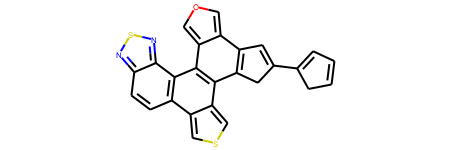

1

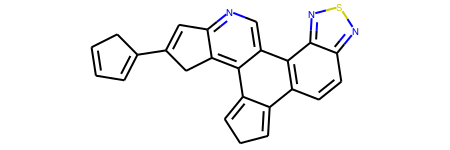

2

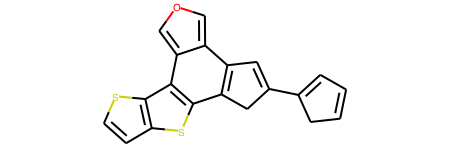

3

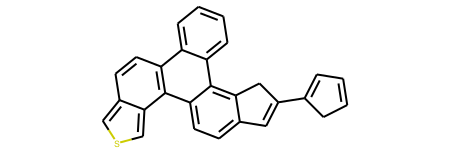

4

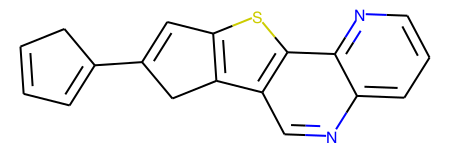

5

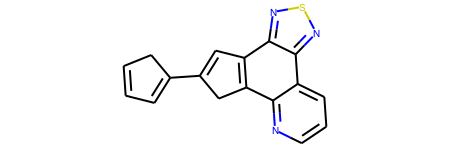

6

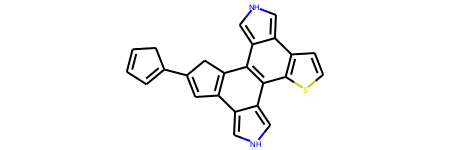

7

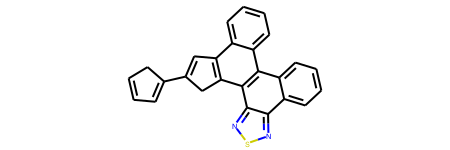

8

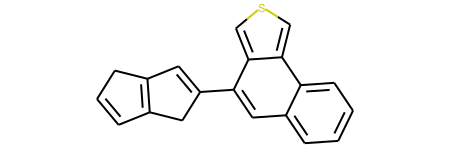

9

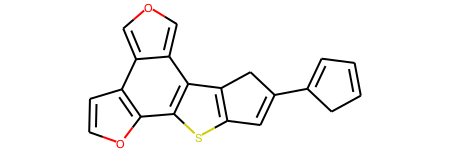

In [108]:
for i in range(10):
    data_sulfer['structure'].values[i] = Chem.MolFromSmiles(data_sulfer['SMILES_str'].values[i])
    display(i, data_sulfer['structure'].values[i])

In [106]:
data_sulfer

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,structure
24,2359381,C1C=CC=C1C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1c1...,C26H14N2OS2,434.5416,4.112982,0.299549,211.318161,-4.899549,1.409229,-3.490319,C1=CC=C(C1)C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1...,
30,131187,C1C=c2c3ccc4nsnc4c3c3cnc4C=C(Cc4c3c2=C1)C1=CC=CC1,C24H15N3S,377.4695,6.517681,0.691659,145.026911,-5.291659,1.706854,-3.584805,C1=CC=C(C1)C1=Cc2ncc3c(c2C1)c1=CCC=c1c1ccc2nsn...,
40,912065,C1C=CC=C1C1=Cc2c(C1)c1sc3ccsc3c1c1cocc21,C20H12OS2,332.4458,1.822889,0.219556,127.779598,-4.819556,1.799819,-3.019738,C1=CC=C(C1)C1=Cc2c(C1)c1sc3ccsc3c1c1cocc21,
49,2228382,C1C=CC=C1C1=Cc2ccc3c(c2C1)c1ccccc1c1ccc2cscc2c31,C28H18S,386.5162,2.493540,0.439489,87.320404,-5.039489,2.055788,-2.983701,C1=CC=C(C1)C1=Cc2ccc3c(c2C1)c1ccccc1c1ccc2cscc...,
54,1010375,C1C=CC=C1C1=Cc2sc3c(cnc4cccnc34)c2C1,C18H12N2S,288.3728,2.987435,0.620208,74.132525,-5.220208,2.159418,-3.060790,C1=CC=C(C1)C1=Cc2sc3c(cnc4cccnc34)c2C1,
56,491698,C1C=CC=C1C1=Cc2c(C1)c1ncccc1c1nsnc21,C17H11N3S,289.3609,4.706792,0.714654,101.362420,-5.314654,1.957928,-3.356725,C1=CC=C(C1)C1=Cc2c(C1)c1ncccc1c1nsnc21,
57,524469,C1C=CC=C1C1=Cc2c(C1)c1c3c[nH]cc3c3ccsc3c1c1c[n...,C24H16N2S,364.4704,0.000000,0.000000,140.537136,-4.410023,1.733767,-2.676256,C1=CC=C(C1)C1=Cc2c(C1)c1c3c[nH]cc3c3ccsc3c1c1c...,
58,458935,C1C=CC=C1C1=Cc2c(C1)c1c3nsnc3c3ccccc3c1c1ccccc21,C26H16N2S,388.4924,4.275919,0.538884,122.118699,-5.138884,1.832176,-3.306707,C1=CC=C(C1)C1=Cc2c(C1)c1c3nsnc3c3ccccc3c1c1ccc...,
71,1114349,C1C=CC2=C1C=C(C2)c1cc2ccccc2c2cscc12,C20H14S,286.3966,1.790937,0.329567,83.634150,-4.929567,2.080275,-2.849292,C1=CC2=C(C1)C=C(C2)c1cc2ccccc2c2cscc12,
72,1048817,C1C=CC=C1C1=Cc2sc3c4occc4c4cocc4c3c2C1,C20H12O2S,316.3788,1.513968,0.208218,111.904241,-4.808218,1.890338,-2.917880,C1=CC=C(C1)C1=Cc2sc3c4occc4c4cocc4c3c2C1,


# import from .mol


In [99]:
f24 = Chem.MolFromMolFile('f24.mol')
f24_ss = Chem.MolToSmiles(f24)

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)

In [94]:
f24

In [109]:
def NSN(x):
    if x.find('nsn') != -1:
        return True
    else:
        return False
data_NSN = data[[NSN(x) for x in data['SMILES_str']]]
data_NSN.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,structure
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,<rdkit.Chem.rdchem.Mol object at 0x12055c9e0>
5,1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...,<rdkit.Chem.rdchem.Mol object at 0x12055cc10>
14,1638442,C1C=c2ccc3cnc4c5[SiH2]C(=Cc5c5nsnc5c4c3c2=C1)C...,C23H15N3SSi,393.5445,6.462512,0.602405,165.105179,-5.202405,1.603165,-3.599240,C1=CC=C(C1)C1=Cc2c([SiH2]1)c1ncc3ccc4=CCC=c4c3...,
21,2096063,C1C=CC=C1c1cc2[se]c3c(c2c2cscc12)c1ccccc1c1ccc...,C27H14N2S2Se,509.5136,6.204093,0.570055,167.497914,-5.170055,1.593078,-3.576977,C1=CC=C(C1)c1cc2[se]c3c(c2c2cscc12)c1ccccc1c1c...,
24,2359381,C1C=CC=C1C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1c1...,C26H14N2OS2,434.5416,4.112982,0.299549,211.318161,-4.899549,1.409229,-3.490319,C1=CC=C(C1)C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1...,


0

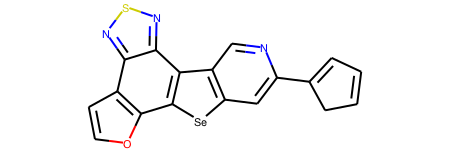

1

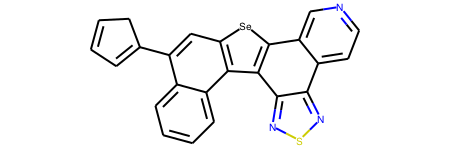

2

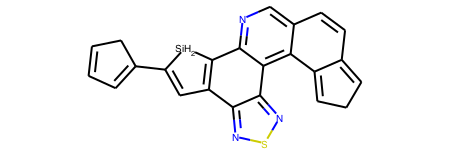

3

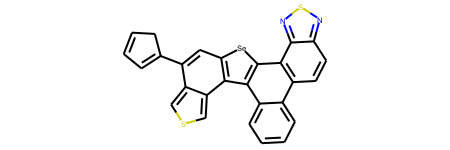

4

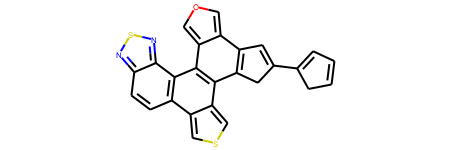

5

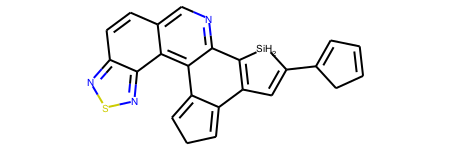

6

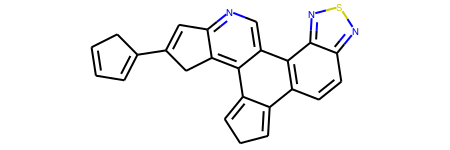

7

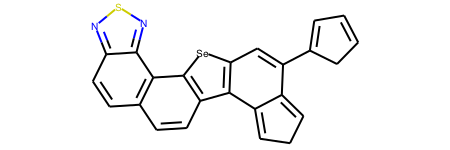

8

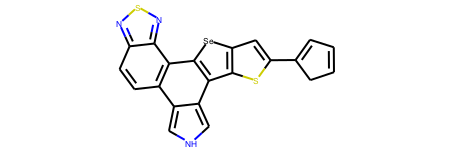

9

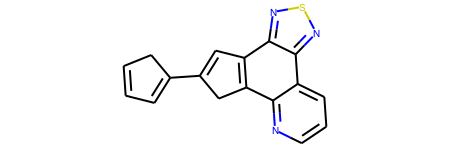

In [110]:
for i in range(10):
    data_NSN['structure'].values[i] = Chem.MolFromSmiles(data_NSN['SMILES_str'].values[i])
    display(i, data_NSN['structure'].values[i])